 DAEDALUS – Distributed and Automated Evolutionary Deep Architecture Learning with Unprecedented Scalability

This research code was developed as part of the research programme Open Technology Programme with project number 18373, which was financed by the Dutch Research Council (NWO), Elekta, and Ortec Logiqcare.

Project leaders: Peter A.N. Bosman, Tanja Alderliesten
Researchers: Alex Chebykin, Arthur Guijt, Vangelis Kostoulas
Main code developer: Arthur Guijt

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
!xsv cat rows ./sampling-nasbench-points/*.csv > sampling-nasbench-points.csv

In [4]:
data = pd.read_csv("./sampling-nasbench-points.csv")
data = data.rename(columns={"evaluation_time": "evaluation time"})

0.31519596009660594


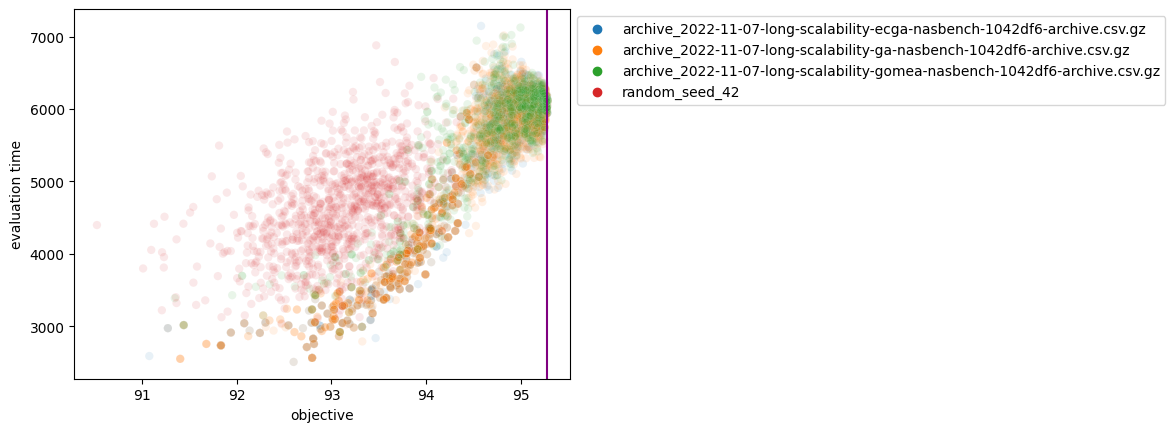

In [24]:
lf = np.polynomial.Polynomial.fit(data["objective"], data["evaluation time"], 1)
rsq = np.sum((lf(data["objective"]) - data["evaluation time"])**2) / np.sum((data["evaluation time"] - np.mean(data["evaluation time"]))**2)
print(rsq)
# sns.regplot(data=data, x="objective", y="evaluation time", fit_reg=True, scatter_kws={'alpha':0.1})
sns.scatterplot(data=data, x="objective", y="evaluation time", hue="source", alpha=0.1)
plt.axvline(95.2727, color="purple")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
#sidenote: these points are - by how they are collected - biased towards lower evaluation times.

In [65]:
import sklearn.ensemble
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.dummy

In [74]:
X = np.array([[int(n) for n in r] for r in data["solution"].str.split()])
y = data["evaluation time"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y.to_numpy(), train_size=0.5, test_size=0.5, random_state=42)

In [59]:
linear_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.linear_model.LinearRegression())])
tree_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.ensemble.RandomForestRegressor())])
dummy_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.dummy.DummyRegressor())])

In [75]:
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
dummy_model.fit(X_train, y_train)

NameError: name 'dummy_model' is not defined

In [79]:
dict(zip(linear_model['enc'].get_feature_names_out(), linear_model['cls'].coef_))

{'x0_0': -357.5699099629733,
 'x0_1': -238.88309167670505,
 'x0_2': -176.8865524707454,
 'x0_3': 315.16658435858074,
 'x0_4': 414.5902641609902,
 'x0_5': -17.363997511111066,
 'x0_6': 60.94670310195706,
 'x1_0': -214.9380615838385,
 'x1_1': -239.11811461432524,
 'x1_2': -196.4290507458346,
 'x1_3': 313.59644907178694,
 'x1_4': 412.45764472793275,
 'x1_5': -97.27765909912897,
 'x1_6': 21.70879224339816,
 'x2_0': -85.33544792069125,
 'x2_1': -84.90364246457499,
 'x2_2': 62.177980405702264,
 'x2_3': 62.78972557470808,
 'x2_4': 137.01796067619892,
 'x2_5': -73.38307528440225,
 'x2_6': -18.36350098694404,
 'x3_0': -111.10584733459889,
 'x3_1': -103.92019729933335,
 'x3_2': 55.053060840088975,
 'x3_3': 114.83482746888507,
 'x3_4': 165.77070746872388,
 'x3_5': -88.98042658086374,
 'x3_6': -31.65212456290219,
 'x4_0': -43.38982928205694,
 'x4_1': 27.796136724896495,
 'x4_2': 15.59369255718286,
 'x5_0': 6.667976409956396,
 'x5_1': 2.203001050393944,
 'x5_2': -35.22403005588424,
 'x5_3': 16.4938

In [80]:
import sklearn.metrics

[
sklearn.metrics.mean_squared_error(linear_model.predict(X_test), y_test), 
sklearn.metrics.mean_squared_error(tree_model.predict(X_test), y_test),
sklearn.metrics.mean_squared_error(dummy_model.predict(X_test), y_test)
]

[145472.7172024459, 147659.24769832753, 1009211.9803689239]

<AxesSubplot: >

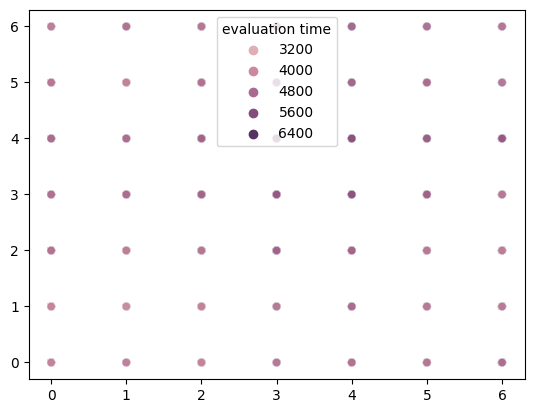

In [46]:
sns.scatterplot(data=data, x=X[:, 0], y=X[:, 1], hue="evaluation time", alpha=0.1)

<AxesSubplot: ylabel='evaluation time'>

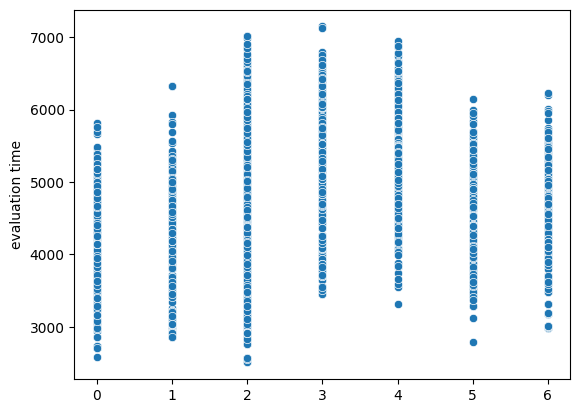

In [43]:
sns.scatterplot(data=data, x=X[:, 0], y="evaluation time")

<AxesSubplot: ylabel='evaluation time'>

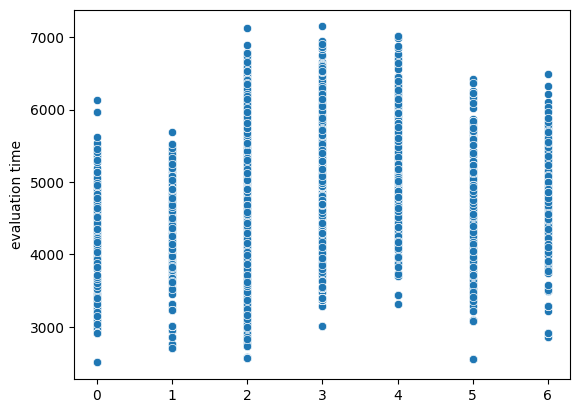

In [47]:
sns.scatterplot(data=data, x=X[:, 1], y="evaluation time")

<AxesSubplot: ylabel='evaluation time'>

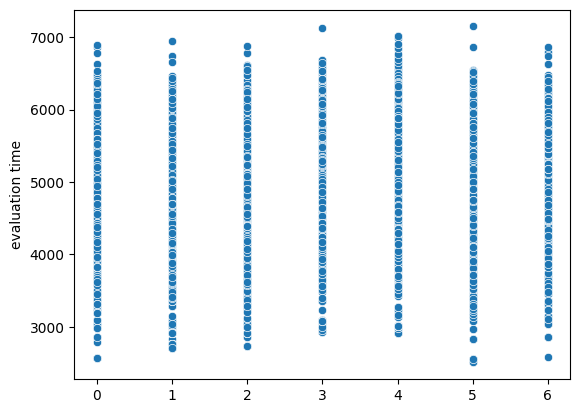

In [48]:
sns.scatterplot(data=data, x=X[:, 11], y="evaluation time")